In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [2]:
class Model:

    def __init__(self, k, b):
        ''' y = k * x + b
            y = f(x | k, b)
            function of x for given (k, b) values
        '''
        self.k = k
        self.b = b

    def set_params(self, k, b):
        self.k = k
        self.b = b

    def evaluate(self, x):
        return self.k * x + self.b


K_TRUE = 1.0   # [m/N]
B_TRUE = 4.0   # [m]
model_true = Model(k=K_TRUE, b=B_TRUE)

In [3]:
# y = k * x + b - Hooks law
# y - length of spring [m]
# k - Young modullus   [m/N]
# b - initial length of spring when no force is applied [m]
# x - force applied [N]

class Experiment:

    def __init__(self, model):
        self.model = model

    def run(self, x_min, x_max, num_x, file_name):
        # min force, max force, num of measurements
        x_list = np.linspace(x_min, x_max, num_x)
        y_list = []
        for x in x_list:
            y = self.model.evaluate(x)
            y_list.append(y)
        data = {
            'x': x_list,
            'y': y_list,
        }
        df = pd.DataFrame(data)
        df.to_csv(file_name, index=False)


experiment = Experiment(model=model_true)
experiment.run(
    x_min=0,
    x_max=10,
    num_x=11,
    file_name='results.csv'
)

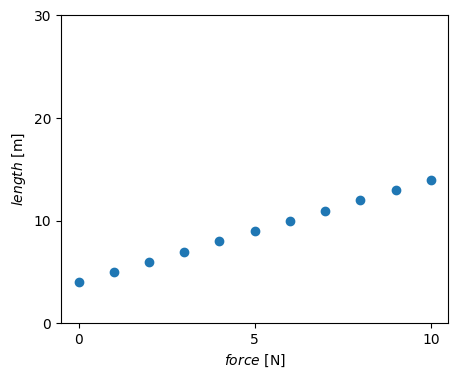

In [4]:
class Data:

    def __init__(self, file_name):
        self.df = pd.read_csv(file_name)

    def plot(self):
        plt.figure(figsize=(5, 4))   # size in inches
        plt.scatter(
            self.df.x,
            self.df.y,
        )
        plt.xlabel('$force$ [N]')
        plt.ylabel('$length$ [m]')
        plt.xticks([0, 5, 10])
        plt.yticks([0, 10, 20, 30])
        # TODO ticks inside and all sides
        plt.savefig('data.png', dpi=100)  # dots per inch


data = Data(file_name='results.csv')
data.plot()

In [5]:
# Thing that takes data and model and tries to
# fit model to data is called an optimizer.
# Optimizer takes control of model parameters
# and looks to minimize the difference between
# data and model - loss function.

In [6]:
# not even wrong

In [7]:
# Optimizers: by eye, grid seach, random walker, gradient descent

# Loss functions:
# Mean squared error

In [8]:
def mean_squared_error_loss(y_data, y_model):
    # y is length [m]
    # delta_y [m]
    # delta_y2 [m2]
    # delta_y_i = y_data_i - y_model_i
    # trick of numpy vectorization to perform ops on all elements in array
    delta_y = y_data - y_model
    delta_y2 = delta_y**2
    return np.mean(delta_y2)

100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


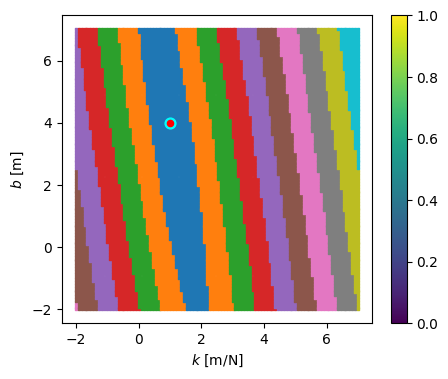

In [9]:
class GridSearchOptimizer:

    def __init__(self, data, model):
        self.data = data
        self.model = model
        self.k_list = []
        self.b_list = []
        self.loss_list = []
        self.idx_min = None

    def run(self, k_lim, b_lim, num_k, num_b):
        # optimizer will sample the model parameter space
        # with a regular grid of steps
        for k in tqdm.tqdm(np.linspace(k_lim[0], k_lim[1], num_k)):
            for b in np.linspace(b_lim[0], b_lim[1], num_b):
                self.model.set_params(k, b)
                y_model = self.model.evaluate(self.data.df.x)
                loss = mean_squared_error_loss(
                    y_data=self.data.df.y,
                    y_model=y_model
                )
                self.k_list.append(k)
                self.b_list.append(b)
                self.loss_list.append(loss)
        self.idx_min = np.argmin(self.loss_list)

    def plot(self):
        plt.figure(figsize=(5, 4))
        plt.scatter(
            self.k_list,
            self.b_list,
            c=np.sqrt(self.loss_list),
            cmap='tab10',
            s=2,
            marker='s',
            zorder=0
        )
        plt.scatter(
            self.k_list[self.idx_min],
            self.b_list[self.idx_min],
            s=20,
            c='r',
            zorder=2
        )
        plt.scatter(
            K_TRUE,
            B_TRUE,
            s=60,
            c='cyan',
            zorder=1
        )
        plt.xlabel('$k$ [m/N]')
        plt.ylabel('$b$ [m]')
        plt.colorbar()
        # TODO add label for mean squard error units of measurement [m2]
        plt.savefig('param_grid.png', dpi=100)


model_to_fit = Model(k=0, b=0)
optimizer = GridSearchOptimizer(data=data, model=model_to_fit)
optimizer.run(
    k_lim=(-2, 7),   # ~3
    b_lim=(-2, 7),
    num_k=100,
    num_b=100,
)
optimizer.plot()

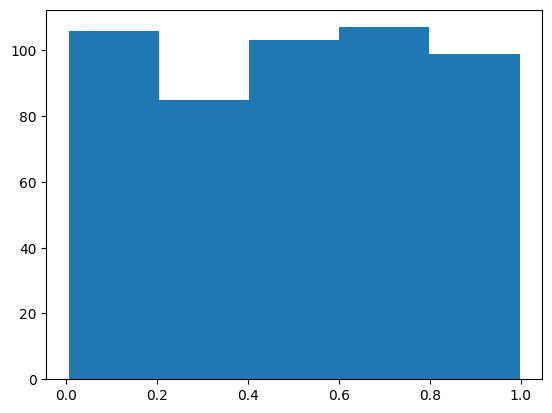

In [41]:
x = np.random.uniform(low=0, high=1, size=500)

plt.hist(x, bins=5);

In [ ]:
# for Puason distribution
# standard deviation = sqrt(mean)


# mean = 100
# sigma = sqrt(100) = 10

# S/N = mean / sigma = 100 / 10 = 10 = mean / sqrt(mean) = sqrt(mean)

# 1000; S/N ~30.

# 10,000, S/N = 10,000 / sqrt(10,000) = 100.

# ~65000

In [42]:
# CCD 16 bit, 0-65535

In [43]:
# 25-75% keep signal